In [436]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import hts
import numpy as np

In [437]:
df=pd.read_csv("one_bu_test_train_dataset.csv")
df.head()

,product_id,Business Unit,Business Group,Major Product Group,Product Group,lineage,monthly_date,month,avg_map_discount,discount_avg,price,days_discount,days_map_discount,sell_in_qty,requested_qty,discount_max,max_map_discount
0,534,2,9052,E43,3199,7131,4/1/2020,4,0.0,0.0,66.86793,0.0,0.0,417.000000,507.000000,0.0,0.0
1,534,2,9052,E43,3199,7131,12/1/2019,12,0.0,0.0,66.86793,0.0,0.0,87.000000,87.000000,0.0,0.0
2,534,2,9052,E43,3199,7131,2/1/2020,2,0.0,0.0,66.86793,0.0,0.0,12.428571,27.857143,0.0,0.0
3,534,2,9052,E43,3199,7131,3/1/2020,3,0.0,0.0,66.86793,0.0,0.0,78.000000,102.000000,0.0,0.0
4,534,2,9052,E43,3199,7131,11/1/2019,11,0.0,0.0,66.86793,0.0,0.0,19.714286,23.142857,0.0,0.0


In [438]:
df['monthly_date'] = pd.to_datetime(df['monthly_date'], format='%m/%d/%Y')

In [439]:
del df["Business Unit"]
del df["Business Group"]
df=df.drop([454, 4798, 4799])
del df["lineage"]

In [440]:
df=df.sort_values(by="monthly_date")

In [441]:
df.head()

,product_id,Major Product Group,Product Group,monthly_date,month,avg_map_discount,discount_avg,price,days_discount,days_map_discount,sell_in_qty,requested_qty,discount_max,max_map_discount
1005,527,E43,7756,2017-12-01,12,0.0,0.0,44.982210,0.0,0.0,2.142857,2.142857,0.0,0.0
2431,676,E41,3183,2017-12-01,12,0.0,0.0,47.819013,0.0,0.0,7.857143,7.857143,0.0,0.0
3435,586,E42,3192,2017-12-01,12,0.0,0.0,1.848565,0.0,0.0,10.285714,10.285714,0.0,0.0
5677,522,O35,7746,2017-12-01,12,0.0,0.0,18.596891,0.0,0.0,25.714286,29.428571,0.0,0.0
3097,820,O36,3190,2017-12-01,12,0.0,0.0,2.817612,0.0,0.0,28.285714,28.285714,0.0,0.0


In [445]:
df_bottom_level = df.pivot(index="monthly_date", columns="product_id", values=["requested_qty"])
ids=np.sort(df["product_id"].unique())
ids=[str(e) for e in ids]
df_bottom_level.columns=ids
df_bottom_level.head()

,493,494,495,496,497,498,499,500,501,502,...,830,831,832,833,834,835,836,837,838,839
monthly_date,,,,,,,,,,,,,,,,,,,,,
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.571429,NaN,44.571429,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,463.714286,192.000000,2156.571429,503.142857,1324.285714,2082.857143,1776.857143,NaN,NaN,12.0
2018-02-01,NaN,NaN,50.285714,NaN,741.000000,NaN,NaN,NaN,NaN,217.428571,...,284.571429,535.714286,3676.285714,2256.000000,1410.000000,6794.571429,4239.428571,NaN,NaN,NaN
2018-03-01,NaN,NaN,0.000000,NaN,573.857143,NaN,NaN,NaN,NaN,240.285714,...,443.142857,412.285714,2612.571429,1548.857143,1560.000000,5756.571429,2275.714286,NaN,NaN,NaN
2018-04-01,NaN,NaN,204.571429,NaN,613.714286,NaN,NaN,NaN,NaN,1956.000000,...,468.857143,166.285714,3014.571429,1494.000000,458.571429,10968.000000,2962.285714,NaN,NaN,NaN


In [447]:
df_middle_level = df.groupby(["monthly_date", "Product Group"]) \
                    .sum() \
                    .reset_index(drop=False) \
                    .pivot(index="monthly_date", columns="Product Group", values="requested_qty")
i=np.sort(df["Product Group"].unique())
i=[str(e) for e in i]
df_middle_level.columns=i
df_middle_level.head()

,3108,3182,3183,3184,3185,3186,3187,3188,3190,3192,3199,5849,7745,7746,7756,7757
monthly_date,,,,,,,,,,,,,,,,
2017-12-01,4.285714,115.428571,26.428571,331.142857,1126.857143,404.000000,1768.714286,58.428571,625.714286,1580.571429,NaN,34.285714,393.714286,268.714286,2.142857,NaN
2018-01-01,267.428571,2476.000000,759.142857,10429.142858,52777.142856,10429.714286,86082.000000,9399.571429,34012.000000,90730.285717,385.714286,893.142857,16299.428571,16396.285714,423.000000,12.0
2018-02-01,640.285714,2553.285715,1052.571429,12265.428572,64646.571430,16635.428569,106426.571427,19292.714289,58887.714286,114115.428566,528.428571,725.142857,20712.571429,25103.142855,1014.428571,21.0
2018-03-01,186.000000,119.285714,510.857143,10920.285715,80462.428566,18606.857143,51941.714286,12505.285714,52734.857143,66789.142859,879.857143,663.428571,20656.285714,21408.714286,643.428571,0.0
2018-04-01,NaN,477.142857,574.428571,16731.714286,63701.857142,10749.142860,56608.285714,4377.285714,41340.285715,77774.571434,903.857143,363.428571,24792.857142,8959.714286,1004.285714,0.0


In [448]:
df_top_level = df.groupby(["monthly_date", "Major Product Group"]) \
                    .sum() \
                    .reset_index(drop=False) \
                    .pivot(index="monthly_date", columns="Major Product Group", values="requested_qty")
df_top_level.head()

Major Product Group,E41,E42,E43,O35,O36,O38
monthly_date,,,,,,
2017-12-01,477.285714,1580.571429,2.142857,3558.000000,625.714286,496.714286
2018-01-01,13931.714286,90730.285717,820.714286,171554.857142,34012.000000,20722.428572
2018-02-01,16511.571429,114115.428566,1563.857143,216888.857141,58887.714286,36653.285715
2018-03-01,11736.428572,66789.142859,1523.285714,174469.142853,52734.857143,31775.571428
2018-04-01,17783.285714,77774.571434,1908.142857,154062.714285,41340.285715,15489.857145


In [449]:
df_total = df.groupby("monthly_date")["requested_qty"] \
             .sum() \
             .to_frame() \
             .rename(columns={"requested_qty": "total"})
df_total.head()

,total
monthly_date,
2017-12-01,6740.428571
2018-01-01,331772.000002
2018-02-01,444620.714280
2018-03-01,339028.428569
2018-04-01,308358.857150


In [450]:
hierarchy_df = df_bottom_level.join(df_middle_level).join(df_top_level).join(df_total)
hierarchy_df.index = pd.to_datetime(hierarchy_df.index)

print(f"Number of time series at the bottom level: {df_bottom_level.shape[1]}")
print(f"Number of time series at the middle level: {df_middle_level.shape[1]}")
print(f"Number of time series at the top level: {df_top_level.shape[1]}")

hierarchy_df.head()

Number of time series at the bottom level: 335
Number of time series at the middle level: 16
Number of time series at the top level: 6


,493,494,495,496,497,498,499,500,501,502,...,7746,7756,7757,E41,E42,E43,O35,O36,O38,total
monthly_date,,,,,,,,,,,,,,,,,,,,,
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,268.714286,2.142857,NaN,477.285714,1580.571429,2.142857,3558.000000,625.714286,496.714286,6740.428571
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16396.285714,423.000000,12.0,13931.714286,90730.285717,820.714286,171554.857142,34012.000000,20722.428572,331772.000002
2018-02-01,NaN,NaN,50.285714,NaN,741.000000,NaN,NaN,NaN,NaN,217.428571,...,25103.142855,1014.428571,21.0,16511.571429,114115.428566,1563.857143,216888.857141,58887.714286,36653.285715,444620.714280
2018-03-01,NaN,NaN,0.000000,NaN,573.857143,NaN,NaN,NaN,NaN,240.285714,...,21408.714286,643.428571,0.0,11736.428572,66789.142859,1523.285714,174469.142853,52734.857143,31775.571428,339028.428569
2018-04-01,NaN,NaN,204.571429,NaN,613.714286,NaN,NaN,NaN,NaN,1956.000000,...,8959.714286,1004.285714,0.0,17783.285714,77774.571434,1908.142857,154062.714285,41340.285715,15489.857145,308358.857150


In [451]:
# for forecasting
f=hierarchy_df
hierarchy_df=hierarchy_df[:-2]

In [452]:
hierarchy_df=hierarchy_df.replace(np.nan, 0)
major = df["Major Product Group"].unique()
prod = df["Product Group"].unique()
ids = df["product_id"].unique()

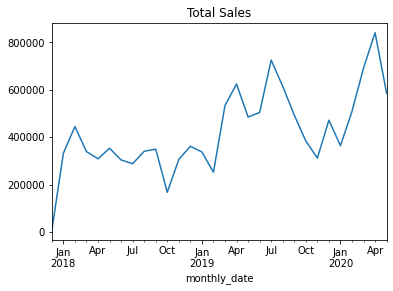

In [453]:
hierarchy_df["total"].plot(title="Total Sales")


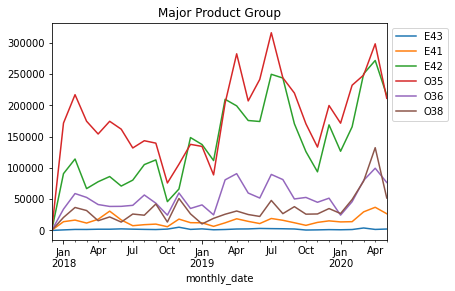

In [454]:
ax = hierarchy_df[major].plot(title="Major Product Group")
ax.legend(bbox_to_anchor=(1.0, 1.0));

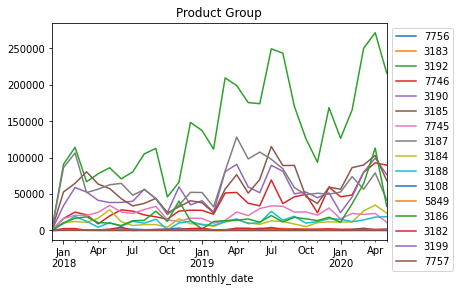

In [455]:
prod= [str(e) for e in prod]
ax = hierarchy_df[prod].plot(title="Product Group")
ax.legend(bbox_to_anchor=(1.0, 1.0));

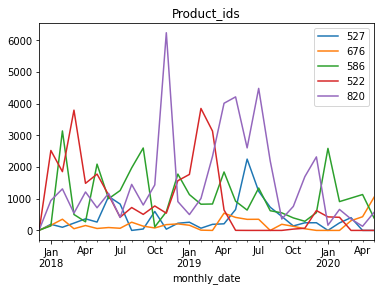

In [456]:
i=df["product_id"].unique()
ids=[str(e) for e in i]
ax = hierarchy_df[ids[:5]].plot(title="Product_ids")
ax.legend(bbox_to_anchor=(1.0, 1.0));

In [457]:
def plot_results(pred_df, source_df, cols_to_plot):
    
    if type(cols_to_plot) == str:
        cols_to_plot = list(cols_to_plot)
        
    for col in cols_to_plot:
        fig, ax = plt.subplots()
        pred_df[col].plot(ax=ax, label="Predicted")
        source_df[col].plot(ax=ax, label="Observed")
        
        ax.legend()
        ax.set_title(col)
        ax.set_xlabel("Date")
        ax.set_ylabel("Trips");

In [499]:

maj = df["Major Product Group"].unique()
total = {'total': list(df_top_level.columns)}
total


{'total': ['E41', 'E42', 'E43', 'O35', 'O36', 'O38']}

In [500]:
m={}
for i in maj:
    tf=df[df["Major Product Group"]==i]
    pg=np.sort(tf["Product Group"].unique())
    pg=[str(e) for e in pg]
    m[str(i)] = list(pg)
m

{'E43': ['3199', '7756', '7757'],
 'E41': ['3108', '3182', '3183', '3184'],
 'E42': ['3192'],
 'O35': ['3185', '3187', '7745', '7746'],
 'O36': ['3190'],
 'O38': ['3186', '3188', '5849']}

In [501]:
idss={}
for i in df["Product Group"].unique():
    tf=df[df["Product Group"]==i]
    pg=np.sort(tf["product_id"].unique())
    pg=[str(e) for e in pg]
    idss[str(i)] = list(pg)

In [502]:
hierarchy = {**total, **m, **idss}

In [503]:
from hts.hierarchy import HierarchyTree
ht = HierarchyTree.from_nodes(nodes=hierarchy, df=hierarchy_df,root='total')
ht

- total
   |- E41
   |  |- 3108
   |  |  - 656
   |  |- 3182
   |  |  |- 673
   |  |  - 674
   |  |- 3183
   |  |  |- 672
   |  |  |- 675
   |  |  |- 676
   |  |  |- 677
   |  |  |- 678
   |  |  - 679
   |  - 3184
   |     |- 554
   |     |- 555
   |     |- 556
   |     |- 564
   |     |- 572
   |     |- 573
   |     |- 574
   |     |- 575
   |     |- 576
   |     |- 577
   |     |- 578
   |     |- 579
   |     |- 651
   |     |- 652
   |     |- 653
   |     |- 654
   |     |- 655
   |     |- 657
   |     |- 761
   |     |- 762
   |     |- 763
   |     - 764
   |- E42
   |  - 3192
   |     |- 557
   |     |- 558
   |     |- 569
   |     |- 570
   |     |- 571
   |     |- 580
   |     |- 581
   |     |- 582
   |     |- 583
   |     |- 584
   |     |- 585
   |     |- 586
   |     |- 587
   |     |- 588
   |     |- 589
   |     |- 590
   |     |- 591
   |     |- 592
   |     |- 593
   |     |- 594
   |     |- 595
   |     |- 596
   |     |- 597
   |     |- 598
   |     |- 599
   |     |- 

## Model testing

In [540]:
hierarchy_df=f[:-4].fillna(0)

In [541]:
model_bu_prophet = hts.HTSRegressor(model='prophet', revision_method='BU', n_jobs=0)
model_bu_prophet = model_bu_prophet.fit(hierarchy_df, hierarchy)
pred_bu_prophet = model_bu_prophet.predict(steps_ahead=2)










Fitting models:   0%|          | 0/358 [00:00<?, ?it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.









Fitting models:   0%|          | 1/358 [00:00<01:27,  4.07it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.









Fitting models:   1%|          | 2/358 [00:00<01:46,  3.36it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_cha

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.









Fitting models:   6%|▌         | 22/358 [00:07<01:39,  3.38it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.









Fitting models:   6%|▋         | 23/358 [00:07<01:34,  3.56it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.









Fitting models:   7%|▋         | 24/358 [00:07<01:30,  3.68it/s]INFO:fbprophet:Disabling weekly seas

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.









Fitting models:  18%|█▊        | 65/358 [00:19<01:23,  3.50it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.









Fitting models:  18%|█▊        | 66/358 [00:20<01:23,  3.49it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.









Fitting models:  19%|█▊        | 67/358 [00:20<01:28,  3.28it/s]INFO:fbprophet:Disabling weekly seas










Fitting models:  24%|██▍       | 86/358 [00:25<01:23,  3.24it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.









Fitting models:  24%|██▍       | 87/358 [00:26<01:22,  3.30it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.









Fitting models:  25%|██▍       | 88/358 [00:26<01:22,  3.27it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbpr

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.









Fitting models:  30%|███       | 108/358 [00:32<01:17,  3.23it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.









Fitting models:  30%|███       | 109/358 [00:32<01:15,  3.28it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.









Fitting models:  31%|███       | 110/358 [00:33<01:18,  3.15it/s]INFO:fbprophet:Disabling weekly s

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.









Fitting models:  36%|███▋      | 130/358 [00:39<01:31,  2.49it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.









Fitting models:  37%|███▋      | 131/358 [00:39<01:24,  2.68it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INF

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.









Fitting models:  48%|████▊     | 173/358 [00:52<00:52,  3.54it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.









Fitting models:  49%|████▊     | 174/358 [00:53<00:50,  3.62it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.









Fitting models:  49%|████▉     | 175/358 [00:53<00:53,  3.41it/s]INFO:fbprophet:Disabling weekly s










Fitting models:  54%|█████▍    | 194/358 [00:59<00:45,  3.57it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.









Fitting models:  54%|█████▍    | 195/358 [00:59<00:42,  3.80it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.









Fitting models:  55%|█████▍    | 196/358 [00:59<00:43,  3.69it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:f

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.









Fitting models:  60%|██████    | 216/358 [01:06<00:49,  2.87it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.









Fitting models:  61%|██████    | 217/358 [01:06<00:48,  2.92it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.









Fitting models:  61%|██████    | 218/358 [01:06<00:45,  3.05it/s]INFO:fbprophet:Disabling weekly s










Fitting models:  66%|██████▌   | 237/358 [01:12<00:34,  3.48it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.









Fitting models:  66%|██████▋   | 238/358 [01:13<00:39,  3.01it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.









Fitting models:  67%|██████▋   | 239/358 [01:13<00:38,  3.09it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:f

INFO:fbprophet:n_changepoints greater than number of observations. Using 21.









Fitting models:  72%|███████▏  | 259/358 [01:19<00:31,  3.16it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.









Fitting models:  73%|███████▎  | 260/358 [01:19<00:32,  3.00it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.









Fitting models:  73%|███████▎  | 261/358 [01:20<00:31,  3.03it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily 

INFO:fbprophet:n_changepoints greater than number of observations. Using 21.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.









Fitting models:  85%|████████▍ | 303/358 [01:32<00:13,  4.12it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.









Fitting models:  85%|████████▍ | 304/358 [01:33<00:12,  4.46it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INF

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.









Fitting models:  91%|█████████ | 324/358 [01:38<00:08,  3.99it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.









Fitting models:  91%|█████████ | 325/358 [01:38<00:08,  3.95it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.









Fitting models:  91%|█████████ | 326/358 [01:38<00:08,  3.77it/s]INFO:fbprophet:Disabling weekly s










Fitting models:  96%|█████████▋| 345/358 [01:44<00:04,  3.03it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.









Fitting models:  97%|█████████▋| 346/358 [01:44<00:03,  3.16it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.









Fitting models:  97%|█████████▋| 347/358 [01:44<00:03,  3.11it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:f

Fitting models:  32%|███▏      | 113/358 [01:59<04:12,  1.03s/it]








Fitting models:  32%|███▏      | 114/358 [02:00<04:07,  1.01s/it]








Fitting models:  32%|███▏      | 115/358 [02:01<04:03,  1.00s/it]








Fitting models:  32%|███▏      | 116/358 [02:02<04:00,  1.00it/s]








Fitting models:  33%|███▎      | 117/358 [02:03<03:58,  1.01it/s]








Fitting models:  33%|███▎      | 118/358 [02:05<04:14,  1.06s/it]








Fitting models:  33%|███▎      | 119/358 [02:06<04:21,  1.09s/it]








Fitting models:  34%|███▎      | 120/358 [02:07<04:17,  1.08s/it]








Fitting models:  34%|███▍      | 121/358 [02:08<04:17,  1.09s/it]








Fitting models:  34%|███▍      | 122/358 [02:09<04:16,  1.09s/it]








Fitting models:  34%|███▍      | 123/358 [02:10<04:14,  1.08s/it]








Fitting models:  35%|███▍      | 124/358 [02:12<05:03,  1.30s/it]








Fitting models:  35%|███▍      | 125/358 [02:13<05:23,  1.39s/it]








Fitting models:  35%|███▌      | 126/3

Fitting models:  77%|███████▋  | 275/358 [04:57<01:21,  1.02it/s]








Fitting models:  77%|███████▋  | 276/358 [04:58<01:20,  1.01it/s]








Fitting models:  77%|███████▋  | 277/358 [04:59<01:19,  1.02it/s]








Fitting models:  78%|███████▊  | 278/358 [05:00<01:29,  1.12s/it]








Fitting models:  78%|███████▊  | 279/358 [05:01<01:25,  1.08s/it]








Fitting models:  78%|███████▊  | 280/358 [05:02<01:21,  1.05s/it]








Fitting models:  78%|███████▊  | 281/358 [05:03<01:19,  1.03s/it]








Fitting models:  79%|███████▉  | 282/358 [05:04<01:17,  1.01s/it]








Fitting models:  79%|███████▉  | 283/358 [05:05<01:15,  1.00s/it]








Fitting models:  79%|███████▉  | 284/358 [05:06<01:13,  1.01it/s]








Fitting models:  80%|███████▉  | 285/358 [05:07<01:11,  1.02it/s]








Fitting models:  80%|███████▉  | 286/358 [05:08<01:11,  1.01it/s]








Fitting models:  80%|████████  | 287/358 [05:09<01:11,  1.01s/it]








Fitting models:  80%|████████  | 288/3

In [552]:
forecasts_bu=pred_bu_prophet.iloc[-2:,-335:]
a_bu=negative_with_zeroes(forecasts_bu[-1:].T.sort_index().values)
b_bu=negative_with_zeroes(forecasts_bu[-2:-1].T.sort_index().values)

In [553]:
a

,656,673,674,672,675,676,677,678,679,554,...,838,702,703,704,664,665,666,667,670,671
2020-03-02,75.108019,184.755302,2770.987552,0.53258,-5.789075,772.202574,-4.362331,32.232940,582.765859,-21.888903,...,-31.762100,130662.421863,266.556834,0.0,0.125351,7751.567964,4670.262402,-199.907761,-407.407634,426.199242
2020-03-03,237.529719,1001.272081,3866.432901,1.23625,-11.375914,1330.824942,-9.799624,59.837346,608.293064,-70.266520,...,-163.316416,196511.446959,716.991716,0.0,0.223476,5783.169322,7032.640242,-365.296712,-803.979046,656.698157


In [554]:
actual_a=f.iloc[-4:-3,:335].fillna(0).T.values
actual_b=f.iloc[-3:-2,:335].fillna(0).T.values

In [555]:
mae(actual_a,a_bu)

3399.667135319884

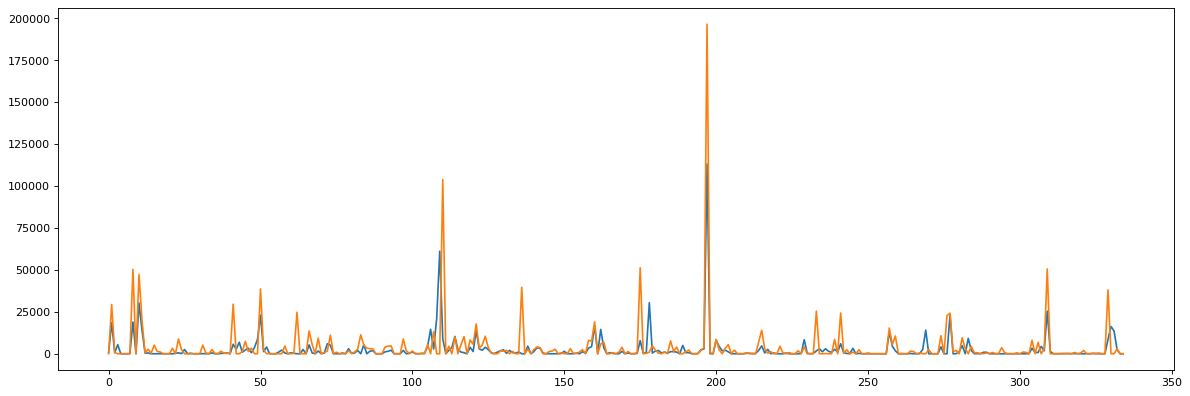

In [557]:
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(actual_a)
plt.plot(a_bu)

## Final Forecast

In [504]:
model_bu_prophet = hts.HTSRegressor(model='prophet', revision_method='BU', n_jobs=0)
model_bu_prophet = model_bu_prophet.fit(hierarchy_df, hierarchy)
pred_bu_prophet = model_bu_prophet.predict(steps_ahead=2)









Fitting models:   0%|          | 0/358 [00:00<?, ?it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:   0%|          | 1/358 [00:00<01:59,  2.99it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:   1%|          | 2/358 [00:00<02:08,  2.77it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_change

INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:   6%|▌         | 22/358 [00:07<01:47,  3.14it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:   6%|▋         | 23/358 [00:07<01:40,  3.32it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:   7%|▋         | 24/358 [00:08<01:47,  3.12it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily season

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  12%|█▏        | 44/358 [00:14<01:56,  2.69it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  13%|█▎        | 45/358 [00:15<01:55,  2.72it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  13%|█▎        | 46/358 [00:15<01:45,  2.96it/s]INFO:fbprophet:Disabling weekly seasona

INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  24%|██▍       | 87/358 [00:27<01:26,  3.14it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  25%|██▍       | 88/358 [00:28<01:31,  2.95it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  25%|██▍       | 89/358 [00:28<01:33,  2.88it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily season

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  30%|███       | 109/358 [00:35<01:15,  3.30it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  31%|███       | 110/358 [00:35<01:18,  3.18it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  31%|███       | 111/358 [00:35<01:20,  3.06it/s]INFO:fbprophet:Disabling weekly seas









Fitting models:  42%|████▏     | 152/358 [00:50<01:26,  2.38it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  43%|████▎     | 153/358 [00:50<01:22,  2.48it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  43%|████▎     | 154/358 [00:50<01:12,  2.82it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbpr

INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  49%|████▊     | 174/358 [00:57<00:56,  3.24it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  49%|████▉     | 175/358 [00:57<00:58,  3.15it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  49%|████▉     | 176/358 [00:58<00:58,  3.13it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily sea

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  55%|█████▍    | 196/358 [01:04<01:00,  2.67it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  55%|█████▌    | 197/358 [01:05<00:58,  2.74it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  55%|█████▌    | 198/358 [01:05<00:50,  3.19it/s]INFO:fbprophet:Disabling weekly seas

INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  67%|██████▋   | 239/358 [01:18<00:34,  3.41it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  67%|██████▋   | 240/358 [01:19<00:36,  3.20it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:

INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  73%|███████▎  | 261/358 [01:26<00:30,  3.13it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  73%|███████▎  | 262/358 [01:26<00:29,  3.29it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  73%|███████▎  | 263/358 [01:26<00:29,  3.24it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily sea

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  79%|███████▉  | 283/358 [01:32<00:21,  3.41it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  79%|███████▉  | 284/358 [01:33<00:25,  2.90it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  80%|███████▉  | 285/358 [01:33<00:25,  2.89it/s]INFO:fbprophet:Disabling weekly seas

INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  85%|████████▌ | 305/358 [01:39<00:15,  3.47it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  85%|████████▌ | 306/358 [01:39<00:16,  3.23it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  86%|████████▌ | 307/358 [01:40<00:16,  3.07it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily sea

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  91%|█████████▏| 327/358 [01:46<00:08,  3.50it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  92%|█████████▏| 328/358 [01:46<00:08,  3.67it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  92%|█████████▏| 329/358 [01:46<00:07,  3.64it/s]INFO:fbprophet:Disabling weekly seas

Fitting models:  13%|█▎        | 45/358 [00:52<06:41,  1.28s/it]







Fitting models:  13%|█▎        | 46/358 [00:53<06:44,  1.30s/it]







Fitting models:  13%|█▎        | 47/358 [00:54<06:43,  1.30s/it]







Fitting models:  13%|█▎        | 48/358 [00:55<06:25,  1.24s/it]







Fitting models:  14%|█▎        | 49/358 [00:57<06:28,  1.26s/it]







Fitting models:  14%|█▍        | 50/358 [00:58<06:08,  1.20s/it]







Fitting models:  14%|█▍        | 51/358 [00:59<06:02,  1.18s/it]







Fitting models:  15%|█▍        | 52/358 [01:00<06:07,  1.20s/it]







Fitting models:  15%|█▍        | 53/358 [01:01<05:51,  1.15s/it]







Fitting models:  15%|█▌        | 54/358 [01:02<05:40,  1.12s/it]







Fitting models:  15%|█▌        | 55/358 [01:03<05:32,  1.10s/it]







Fitting models:  16%|█▌        | 56/358 [01:04<05:29,  1.09s/it]







Fitting models:  16%|█▌        | 57/358 [01:05<05:25,  1.08s/it]







Fitting models:  16%|█▌        | 58/358 [01:07<05:23,  1.08s/it]

Fitting models:  60%|█████▉    | 214/358 [03:59<02:31,  1.05s/it]







Fitting models:  60%|██████    | 215/358 [04:00<02:27,  1.03s/it]







Fitting models:  60%|██████    | 216/358 [04:01<02:24,  1.02s/it]







Fitting models:  61%|██████    | 217/358 [04:02<02:22,  1.01s/it]







Fitting models:  61%|██████    | 218/358 [04:03<02:20,  1.01s/it]







Fitting models:  61%|██████    | 219/358 [04:04<02:24,  1.04s/it]







Fitting models:  61%|██████▏   | 220/358 [04:05<02:35,  1.13s/it]







Fitting models:  62%|██████▏   | 221/358 [04:06<02:37,  1.15s/it]







Fitting models:  62%|██████▏   | 222/358 [04:08<02:38,  1.17s/it]







Fitting models:  62%|██████▏   | 223/358 [04:09<02:38,  1.17s/it]







Fitting models:  63%|██████▎   | 224/358 [04:10<02:38,  1.18s/it]







Fitting models:  63%|██████▎   | 225/358 [04:11<02:37,  1.18s/it]







Fitting models:  63%|██████▎   | 226/358 [04:12<02:36,  1.19s/it]







Fitting models:  63%|██████▎   | 227/358 [04:14<02:

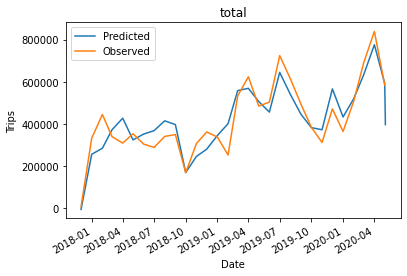

In [470]:
plot_results(pred_bu_prophet, hierarchy_df, cols_to_plot=['total'])

In [468]:
model_td_prophet = hts.HTSRegressor(model='prophet', revision_method='AHP', n_jobs=0)
model_td_prophet = model_td_prophet.fit(hierarchy_df, hierarchy)
pred_td_prophet = model_td_prophet.predict(steps_ahead=2)









Fitting models:   0%|          | 0/358 [00:00<?, ?it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:   0%|          | 1/358 [00:00<02:01,  2.95it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:   1%|          | 2/358 [00:00<02:16,  2.61it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_change

INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:   6%|▌         | 22/358 [00:06<01:34,  3.57it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:   6%|▋         | 23/358 [00:07<01:38,  3.40it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:   7%|▋         | 24/358 [00:07<01:42,  3.27it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily season

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  12%|█▏        | 44/358 [00:14<01:30,  3.46it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  13%|█▎        | 45/358 [00:14<01:23,  3.73it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  13%|█▎        | 46/358 [00:14<01:24,  3.68it/s]INFO:fbprophet:Disabling weekly seasona

INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  24%|██▍       | 87/358 [00:27<01:17,  3.49it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  25%|██▍       | 88/358 [00:27<01:17,  3.49it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  25%|██▍       | 89/358 [00:27<01:32,  2.90it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily season

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  30%|███       | 109/358 [00:34<01:18,  3.16it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  31%|███       | 110/358 [00:34<01:28,  2.81it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  31%|███       | 111/358 [00:34<01:20,  3.06it/s]INFO:fbprophet:Disabling weekly seas









Fitting models:  42%|████▏     | 152/358 [00:49<01:05,  3.14it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  43%|████▎     | 153/358 [00:49<01:02,  3.29it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  43%|████▎     | 154/358 [00:49<01:07,  3.03it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbpr

INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  49%|████▊     | 174/358 [00:56<00:56,  3.27it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  49%|████▉     | 175/358 [00:56<01:00,  3.02it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  49%|████▉     | 176/358 [00:56<01:00,  3.00it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily sea









Fitting models:  55%|█████▍    | 196/358 [01:02<00:48,  3.32it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  55%|█████▌    | 197/358 [01:02<00:42,  3.75it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  55%|█████▌    | 198/358 [01:03<00:47,  3.34it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbpr

INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  61%|██████    | 218/358 [01:09<00:43,  3.25it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  61%|██████    | 219/358 [01:09<00:38,  3.58it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  61%|██████▏   | 220/358 [01:10<00:42,  3.28it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily sea

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  67%|██████▋   | 240/358 [01:15<00:34,  3.41it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  67%|██████▋   | 241/358 [01:16<00:33,  3.48it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  68%|██████▊   | 242/358 [01:16<00:36,  3.16it/s]INFO:fbprophet:Disabling weekly seas

INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  79%|███████▉  | 283/358 [01:30<00:30,  2.47it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  79%|███████▉  | 284/358 [01:30<00:25,  2.89it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  80%|███████▉  | 285/358 [01:31<00:22,  3.28it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily sea

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  85%|████████▌ | 306/358 [01:37<00:16,  3.22it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  86%|████████▌ | 307/358 [01:37<00:14,  3.57it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  91%|█████████▏| 327/358 [01:44<00:09,  3.23it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  92%|█████████▏| 328/358 [01:44<00:08,  3.47it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  92%|█████████▏| 329/358 [01:45<00:08,  3.24it/s]INFO:fbprophet:Disabling weekly seas

Fitting models:  13%|█▎        | 45/358 [00:50<05:49,  1.12s/it]







Fitting models:  13%|█▎        | 46/358 [00:51<05:42,  1.10s/it]







Fitting models:  13%|█▎        | 47/358 [00:52<05:33,  1.07s/it]







Fitting models:  13%|█▎        | 48/358 [00:53<05:34,  1.08s/it]







Fitting models:  14%|█▎        | 49/358 [00:54<05:31,  1.07s/it]







Fitting models:  14%|█▍        | 50/358 [00:55<05:32,  1.08s/it]







Fitting models:  14%|█▍        | 51/358 [00:57<06:15,  1.22s/it]







Fitting models:  15%|█▍        | 52/358 [00:58<05:59,  1.17s/it]







Fitting models:  15%|█▍        | 53/358 [00:59<05:48,  1.14s/it]







Fitting models:  15%|█▌        | 54/358 [01:00<05:40,  1.12s/it]







Fitting models:  15%|█▌        | 55/358 [01:01<05:38,  1.12s/it]







Fitting models:  16%|█▌        | 56/358 [01:02<05:33,  1.10s/it]







Fitting models:  16%|█▌        | 57/358 [01:03<05:27,  1.09s/it]







Fitting models:  16%|█▌        | 58/358 [01:04<05:20,  1.07s/it]

Fitting models:  60%|█████▉    | 214/358 [04:04<02:42,  1.13s/it]







Fitting models:  60%|██████    | 215/358 [04:06<03:04,  1.29s/it]







Fitting models:  60%|██████    | 216/358 [04:07<03:03,  1.29s/it]







Fitting models:  61%|██████    | 217/358 [04:08<02:57,  1.26s/it]







Fitting models:  61%|██████    | 218/358 [04:09<02:57,  1.26s/it]







Fitting models:  61%|██████    | 219/358 [04:11<02:52,  1.24s/it]







Fitting models:  61%|██████▏   | 220/358 [04:12<02:52,  1.25s/it]







Fitting models:  62%|██████▏   | 221/358 [04:13<02:51,  1.25s/it]







Fitting models:  62%|██████▏   | 222/358 [04:14<02:48,  1.24s/it]







Fitting models:  62%|██████▏   | 223/358 [04:16<02:46,  1.23s/it]







Fitting models:  63%|██████▎   | 224/358 [04:17<02:44,  1.23s/it]







Fitting models:  63%|██████▎   | 225/358 [04:18<02:41,  1.22s/it]







Fitting models:  63%|██████▎   | 226/358 [04:19<02:43,  1.24s/it]







Fitting models:  63%|██████▎   | 227/358 [04:20<02:

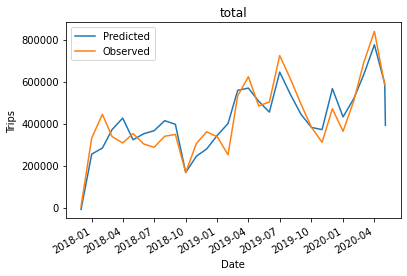

In [471]:
plot_results(pred_td_prophet, hierarchy_df, cols_to_plot=['total'])

In [465]:
model_ols_prophet = hts.HTSRegressor(model='prophet', revision_method='OLS', n_jobs=0)
model_ols_prophet = model_ols_prophet.fit(hierarchy_df, hierarchy)
pred_ols_prophet = model_ols_prophet.predict(steps_ahead=2)









Fitting models:   0%|          | 0/358 [00:00<?, ?it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:   0%|          | 1/358 [00:00<01:57,  3.05it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:   1%|          | 2/358 [00:00<02:18,  2.57it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_change

INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:   6%|▌         | 22/358 [00:07<01:39,  3.37it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:   6%|▋         | 23/358 [00:07<01:43,  3.24it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:   7%|▋         | 24/358 [00:07<01:48,  3.08it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily season

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  12%|█▏        | 44/358 [00:14<01:30,  3.46it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  13%|█▎        | 45/358 [00:14<01:24,  3.71it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  13%|█▎        | 46/358 [00:15<01:24,  3.70it/s]INFO:fbprophet:Disabling weekly seasona

INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  24%|██▍       | 87/358 [00:28<01:28,  3.07it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  25%|██▍       | 88/358 [00:28<01:29,  3.03it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  25%|██▍       | 89/358 [00:29<01:46,  2.52it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily season

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  30%|███       | 109/358 [00:35<01:13,  3.38it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  31%|███       | 110/358 [00:35<01:19,  3.12it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  31%|███       | 111/358 [00:36<01:12,  3.40it/s]INFO:fbprophet:Disabling weekly seas









Fitting models:  42%|████▏     | 152/358 [00:49<01:05,  3.12it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  43%|████▎     | 153/358 [00:50<01:04,  3.19it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  43%|████▎     | 154/358 [00:50<01:10,  2.90it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbpr

INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  49%|████▊     | 174/358 [00:57<00:58,  3.14it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  49%|████▉     | 175/358 [00:57<01:04,  2.82it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  49%|████▉     | 176/358 [00:58<01:05,  2.78it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily sea









Fitting models:  55%|█████▍    | 196/358 [01:03<00:50,  3.23it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  55%|█████▌    | 197/358 [01:03<00:44,  3.63it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  55%|█████▌    | 198/358 [01:04<00:50,  3.17it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbpr

INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  61%|██████    | 218/358 [01:11<00:46,  3.04it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  61%|██████    | 219/358 [01:12<01:02,  2.22it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  61%|██████▏   | 220/358 [01:12<00:58,  2.37it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily sea

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  67%|██████▋   | 240/358 [01:17<00:34,  3.45it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  67%|██████▋   | 241/358 [01:18<00:33,  3.47it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  68%|██████▊   | 242/358 [01:18<00:37,  3.11it/s]INFO:fbprophet:Disabling weekly seas

INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  79%|███████▉  | 283/358 [01:31<00:28,  2.67it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  79%|███████▉  | 284/358 [01:32<00:24,  3.04it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  80%|███████▉  | 285/358 [01:32<00:21,  3.42it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily sea

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  85%|████████▌ | 306/358 [01:38<00:15,  3.27it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  86%|████████▌ | 307/358 [01:38<00:14,  3.58it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  91%|█████████▏| 327/358 [01:45<00:09,  3.43it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  92%|█████████▏| 328/358 [01:45<00:08,  3.65it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.








Fitting models:  92%|█████████▏| 329/358 [01:45<00:08,  3.45it/s]INFO:fbprophet:Disabling weekly seas

Fitting models:  13%|█▎        | 45/358 [00:48<06:01,  1.16s/it]







Fitting models:  13%|█▎        | 46/358 [00:50<06:10,  1.19s/it]







Fitting models:  13%|█▎        | 47/358 [00:51<06:13,  1.20s/it]







Fitting models:  13%|█▎        | 48/358 [00:52<06:09,  1.19s/it]







Fitting models:  14%|█▎        | 49/358 [00:53<06:05,  1.18s/it]







Fitting models:  14%|█▍        | 50/358 [00:55<06:15,  1.22s/it]







Fitting models:  14%|█▍        | 51/358 [00:56<06:21,  1.24s/it]







Fitting models:  15%|█▍        | 52/358 [00:57<06:01,  1.18s/it]







Fitting models:  15%|█▍        | 53/358 [00:58<06:12,  1.22s/it]







Fitting models:  15%|█▌        | 54/358 [00:59<06:06,  1.21s/it]







Fitting models:  15%|█▌        | 55/358 [01:00<05:52,  1.16s/it]







Fitting models:  16%|█▌        | 56/358 [01:01<05:44,  1.14s/it]







Fitting models:  16%|█▌        | 57/358 [01:03<05:38,  1.12s/it]







Fitting models:  16%|█▌        | 58/358 [01:04<06:15,  1.25s/it]

Fitting models:  60%|█████▉    | 214/358 [04:03<02:31,  1.05s/it]







Fitting models:  60%|██████    | 215/358 [04:04<02:30,  1.05s/it]







Fitting models:  60%|██████    | 216/358 [04:05<02:30,  1.06s/it]







Fitting models:  61%|██████    | 217/358 [04:06<02:27,  1.05s/it]







Fitting models:  61%|██████    | 218/358 [04:07<02:25,  1.04s/it]







Fitting models:  61%|██████    | 219/358 [04:09<02:26,  1.06s/it]







Fitting models:  61%|██████▏   | 220/358 [04:10<02:30,  1.09s/it]







Fitting models:  62%|██████▏   | 221/358 [04:11<02:49,  1.24s/it]







Fitting models:  62%|██████▏   | 222/358 [04:12<02:42,  1.19s/it]







Fitting models:  62%|██████▏   | 223/358 [04:13<02:34,  1.15s/it]







Fitting models:  63%|██████▎   | 224/358 [04:15<02:28,  1.11s/it]







Fitting models:  63%|██████▎   | 225/358 [04:16<02:24,  1.09s/it]







Fitting models:  63%|██████▎   | 226/358 [04:17<02:21,  1.07s/it]







Fitting models:  63%|██████▎   | 227/358 [04:18<02:

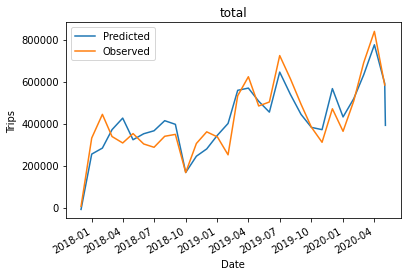

In [472]:
plot_results(pred_ols_prophet, hierarchy_df, cols_to_plot=['total'])

In [473]:
forecasts_ols=pred_ols_prophet.iloc[-2:,-335:]
forecasts_bu=pred_bu_prophet.iloc[-2:,-335:]
forecasts_td=pred_td_prophet.iloc[-2:,-335:]

In [474]:
def negative_with_zeroes(data):
    for i,item in enumerate(data):
        if item<np.float(0):
            data[i]=0
    return data

In [523]:
july_ols=negative_with_zeroes(forecasts_ols[-1:].T.sort_index().values)
june_ols=negative_with_zeroes(forecasts_ols[-2:-1].T.sort_index().values)

july_bu=negative_with_zeroes(forecasts_bu[-1:].T.sort_index().values)
june_bu=negative_with_zeroes(forecasts_bu[-2:-1].T.sort_index().values)

july_td=negative_with_zeroes(forecasts_td[-1:].T.sort_index().values)
june_td=negative_with_zeroes(forecasts_td[-2:-1].T.sort_index().values)

june= (june_ols+june_bu+june_td)/2
july= (july_ols+july_bu+july_td)/2


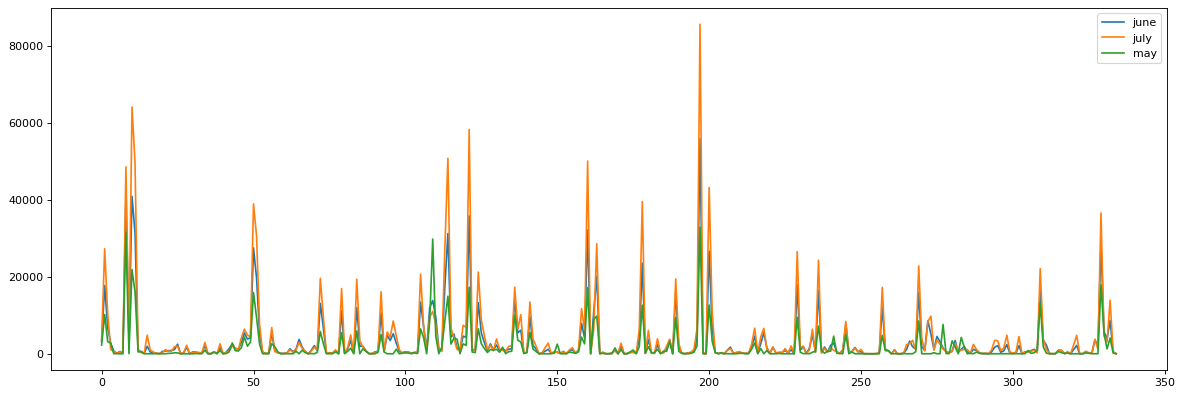

In [524]:
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(june,label="june")
plt.plot(july,label="july")
plt.plot(hierarchy_df.iloc[-1:,:335].values[0],label="may")
plt.legend()

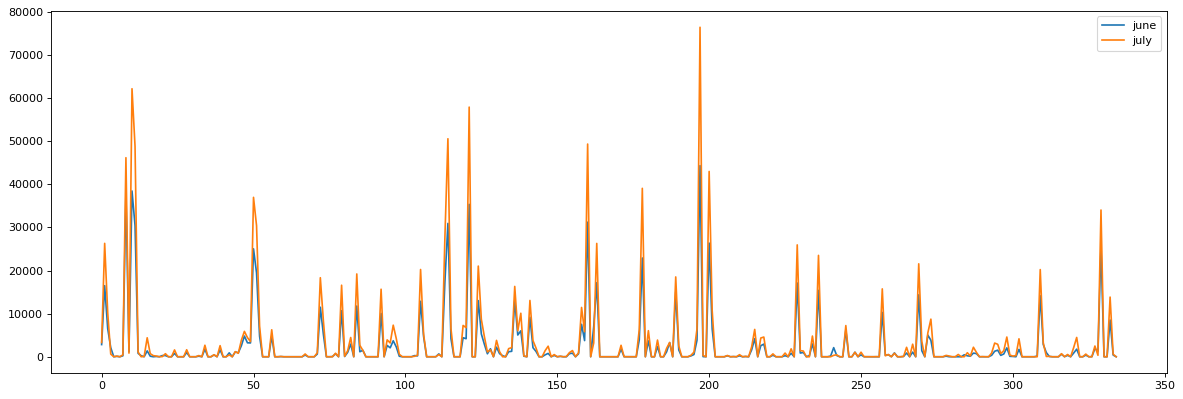

In [509]:
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(june,label="june")
plt.plot(july,label="july")
plt.legend()

In [510]:
may_fore_ols=pred_ols_prophet.iloc[-10:-2,-335:].T.sort_index().values
may_fore_bu=pred_bu_prophet.iloc[-10:-2,-335:].T.sort_index().values
may_fore_td=pred_td_prophet.iloc[-10:-2,-335:].T.sort_index().values

may_fore=(may_fore_ols+may_fore_bu) /2

In [530]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
pred=may_fore
y_test=hierarchy_df.iloc[-8:,:335].T.values
print("Mean Absolute Error is",mae(y_test,pred))
print("Root Mean Squared Error is",np.sqrt(mse(y_test,pred)))
print("R2 score is",r2_score(y_test,pred))
print("Aggregated Measure is ", (mae(y_test,pred)+np.sqrt(mse(y_test,pred))/2)*(1-r2_score(y_test,pred)))

Mean Absolute Error is 471.14664128833124
Root Mean Squared Error is 1088.0698524724492
R2 score is 0.9009655593070918
Aggregated Measure is  100.53793874154424


In [531]:
pred=may_fore_td
y_test=hierarchy_df.iloc[-8:,:335].T.values
print("Mean Absolute Error is",mae(y_test,pred))
print("Root Mean Squared Error is",np.sqrt(mse(y_test,pred)))
print("R2 score is",r2_score(y_test,pred))
print("Aggregated Measure is ", (mae(y_test,pred)+np.sqrt(mse(y_test,pred))/2)*(1-r2_score(y_test,pred)))

Mean Absolute Error is 1302.735793698902
Root Mean Squared Error is 3221.703991911537
R2 score is 0.5297208280612082
Aggregated Measure is  1370.199653089773


In [532]:
pred=may_fore_ols
y_test=hierarchy_df.iloc[-8:,:335].T.sort_index().values
print("Mean Absolute Error is",mae(y_test,pred))
print("Root Mean Squared Error is",np.sqrt(mse(y_test,pred)))
print("R2 score is",r2_score(y_test,pred))
print("Aggregated Measure is ", (mae(y_test,pred)+np.sqrt(mse(y_test,pred))/2)*(1-r2_score(y_test,pred)))

Mean Absolute Error is 471.23537026317155
Root Mean Squared Error is 1088.1131921623987
R2 score is 0.9009669731335408
Aggregated Measure is  100.54743658028228


In [533]:
pred=may_fore_bu
y_test=hierarchy_df.iloc[-8:,:335].T.sort_index().values
print("Mean Absolute Error is",mae(y_test,pred))
print("Root Mean Squared Error is",np.sqrt(mse(y_test,pred)))
print("R2 score is",r2_score(y_test,pred))
print("Aggregated Measure is ", (mae(y_test,pred)+np.sqrt(mse(y_test,pred))/2)*(1-r2_score(y_test,pred)))

Mean Absolute Error is 471.07447468073735
Root Mean Squared Error is 1088.027097903289
R2 score is 0.9009640362601643
Aggregated Measure is  100.53022070119805


In [536]:
df_forecast=pd.DataFrame()
df_forecast["product_id"]=np.sort(df["product_id"].unique())
#df_forecast["May"]=hierarchy_df.iloc[-1:,:335].T.sort_index().values
df_forecast["June"]=[i[0] for i in june]
df_forecast["July"]=[i[0] for i in july]

## Forecast from HTS prophet model.

In [537]:
df_forecast

,product_id,June,July
0,493,3132.055806,3559.228003
1,494,17743.588834,27308.650921
2,495,6742.025326,10375.503854
3,496,2714.155134,1099.074860
4,497,697.574581,555.993276
...,...,...,...
330,835,5766.248776,4595.917961
331,836,3857.388260,3074.484067
332,837,8628.141546,13931.814353
333,838,414.423143,603.370577
